<a href="https://colab.research.google.com/github/elwelch/Tourism_Recommender/blob/main/IncomeMLWorkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Block 27: Workshop
## RetailCo – Customer Income Data Analysis

## Scenario:
You are a machine learning engineer at XYZ Analytics, a data science consulting firm. A large retail company named RetailCo has approached you to help them build a classification model to predict their customers' income group based on their demographic data. The goal is to use this model to better understand their customer demographics and tailor marketing strategies accordingly.  



## Objective:
RetailCo wants you to compare the performance of different classification algorithms, including K-Nearest Neighbors (KNN), Naive Bayes, Random Forest, Logistic Regression Classifier, SVM, and Decision Tree Classifier.



### Dataset: adult.csv

The main objective of the Adult Census Income dataset, which compiles demographic and socioeconomic data on individuals, is to determine if an individual's annual income exceeds $50,000 based on the attributes provided.

age: Age of the individual

workclass: Type of employment of the individual

fnlwgt: This is the final weight, an estimate of the number of people the census believes the given individual represents.

education: Education degree of the individual

education.num: Number of years of education

marital.status: Marital status of the individual

occupation: Occupation of the individual

relationship: Relationship status of the individual in their family

capital.gain: Capital gain of the individual

capital.loss: Capital loss of the individual

hours.per.week: Number of hours the individual works per week

native.country: Native country of the individual

income: Income category of the individual


## Directions:

1. Data Preprocessing: Clean and process the dataset, handling missing values and encoding categorical variables.

    - There are some ‘?’ instead of values in all columns. Replace them with the mode values.
    - Use fillna().

2. Feature Engineering: Create new features if relevant and apply feature scaling.


3. Exploratory Data Analysis (EDA): Visualize the distribution of income levels and relationships between features and income.

    - Fix the imbalanced dataset using the oversampling method.
    - Use RandomOverSampler from imblearn.over_sampling.  
    - Split the predictor and target variables and fit them using fit().


4. Model Selection and Training: Choose KNN, Naive Bayes, and Random Forest as classification algorithms and train them on the data.

    - Import the models from sklearn.linear_model, sklearn.neighbor, sklearn.svm, sklearn.naive_bayes, sklearn.tree, and sklearn.ensemble library.
    - Use .fit() to fit the training data.


5. Model Evaluation: Evaluate model accuracy and F1 score.

    - Import the models from sklearn.metrics.


6. Hyperparameter Tuning: Optimize model hyperparameters for improved performance.


7. Model Comparison and Insights: Compare algorithm performance and provide insights on strengths and weaknesses.


8. Visualization and Reporting: Create visualizations and a comprehensive report for RetailCo.

    - Use classification_report from sklearn.metrics.


9. Final Model Selection: Create a report summarizing the details of the finalized model for RetailCo.

1. Load libraries and dataset

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Importing dataset
dataset = pd.read_csv('adult.csv')
dataset=pd.DataFrame(dataset)

In [10]:
# Preview dataset
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
# Shape of dataset
dataset.shape

(48842, 15)

In [12]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
# Statistical summary
dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


2.	Check for null values and ? in any columns and handle those values. Check the distribution of target variable income and identify if the dataset is balanced.

In [14]:
### BEGIN SOLUTION

### END SOLUTION

In [15]:
### BEGIN HIDDEN TESTS
dataset = dataset.dropna()

dataset = dataset.replace('?', 'unknown')

dataset.head()

#assert 1 == 1, "Incorrect. Try again."
#print ("Correct")
### END HIDDEN TESTS

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,unknown,103497,Some-college,10,Never-married,unknown,Own-child,White,Female,0,0,30,United-States,<=50K


3.	Perform Univariate analysis.

- Create a barplot for column income.

Text(0.5, 1.0, 'Income v Number of Adults')

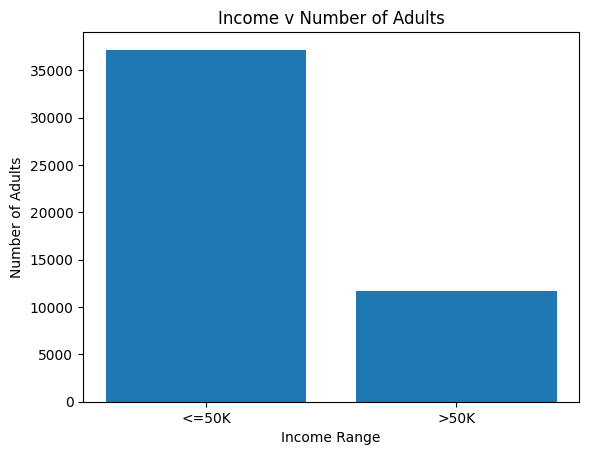

In [16]:
### BEGIN SOLUTION
# Creating a barplot for 'Income'

income_amount=dataset['income'].unique()
income_count=dataset['income'].value_counts()

plt.bar(income_amount,income_count)
plt.ylabel('Number of Adults')
plt.xlabel('Income Range')
plt.title('Income v Number of Adults')

### END SOLUTION

In [17]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


- Create a distribution plot for column age

Text(-3.6805555555555554, 0.5, 'Number of Adults')

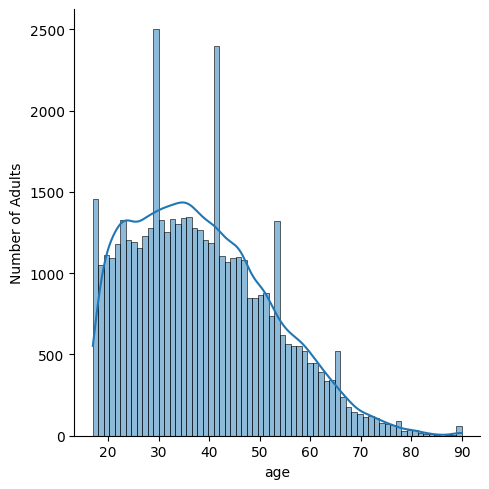

In [18]:
### BEGIN SOLUTION
# Creating a distribution plot for 'Age'

sns.displot(dataset, x="age", kde=True)
plt.ylabel('Number of Adults')

### END SOLUTION

In [19]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Create a barplot for column education

In [20]:
dataset['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

Text(-12.555555555555555, 0.5, 'Number of Adults')

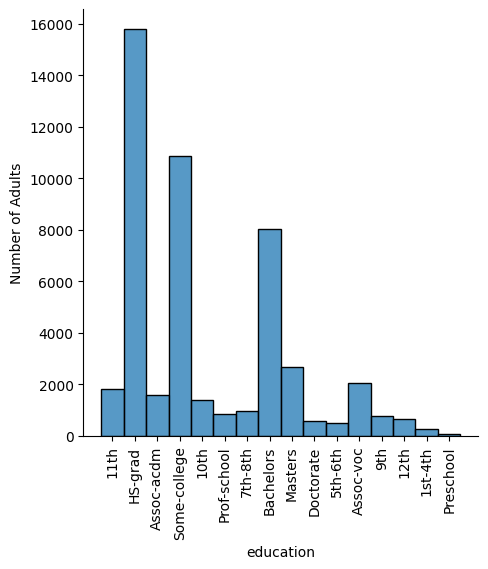

In [21]:
### BEGIN SOLUTION
# Creating a barplot for 'Education'
#custom_order=['Preschool','1st-4th','5th-6th', '7th-8th','9th','10th','11th','12th','HS-grad','Some-college','Assoc-voc','Assoc-acdm', 'Bachelors', 'Masters','Doctorate','Prof-school']
#sorted_df = dataset.sort_values(by='education', key=lambda x: x.map(custom_order))

sns.displot(dataset,x='education',discrete=True,binwidth=3)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Adults')

### END SOLUTION

In [22]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Create a barplot for Years of Education. Use column education.num

Text(-12.555555555555555, 0.5, 'Number of Adults')

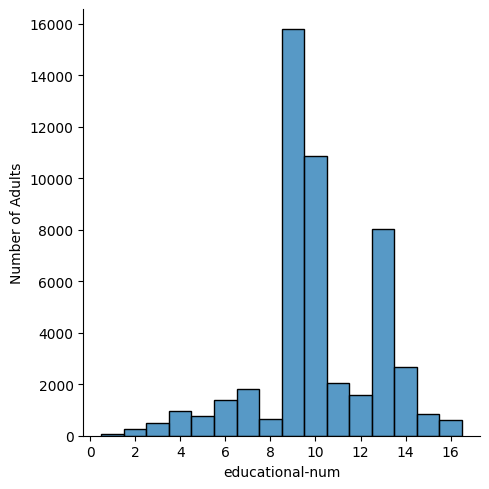

In [23]:
### BEGIN SOLUTION
# Creating a barplot for 'Years of Education'
sns.displot(dataset,x='educational-num',discrete=True,binwidth=3)
plt.ylabel('Number of Adults')

### END SOLUTION

In [24]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Create a pie chart for Marital status. Use column marital.status

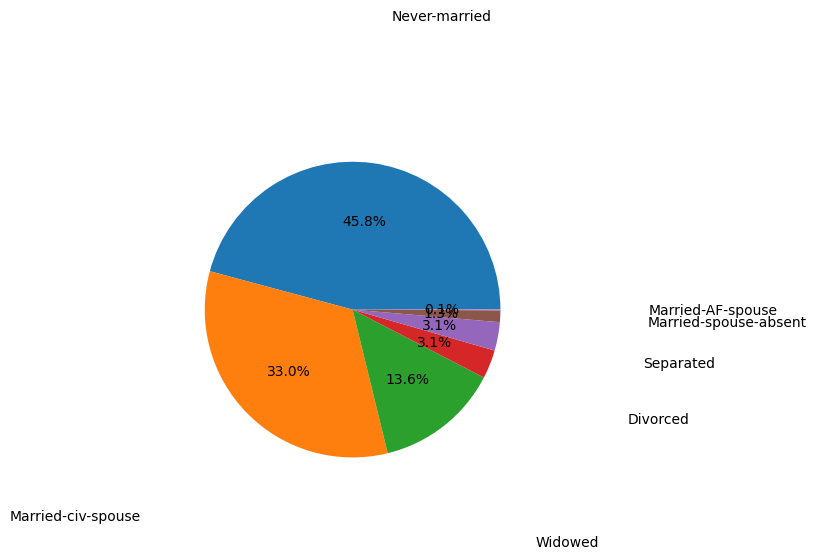

In [25]:
### BEGIN SOLUTION
# Creating a pie chart for 'Marital status'

marital_status=dataset['marital-status'].value_counts()
marital_labels=dataset['marital-status'].unique()

plt.pie(marital_status,labels=marital_labels,autopct="%1.1f%%",labeldistance=2)
plt.show()

### END SOLUTION

In [26]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Create a barplot for column Hours per week

Text(-12.430555555555555, 0.5, 'Number of Adults')

<Figure size 1200x1400 with 0 Axes>

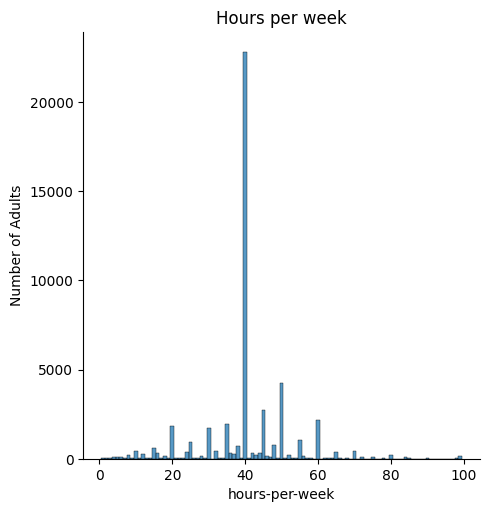

In [27]:
### BEGIN SOLUTION
plt.figure(figsize=(12, 14))
sns.displot(dataset,x='hours-per-week',discrete=True,binwidth=3)
plt.title('Hours per week')
plt.ylabel('Number of Adults')
### END SOLUTION

In [28]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


4. Perform below Bivariate analysis

- Create a countplot of income across column age

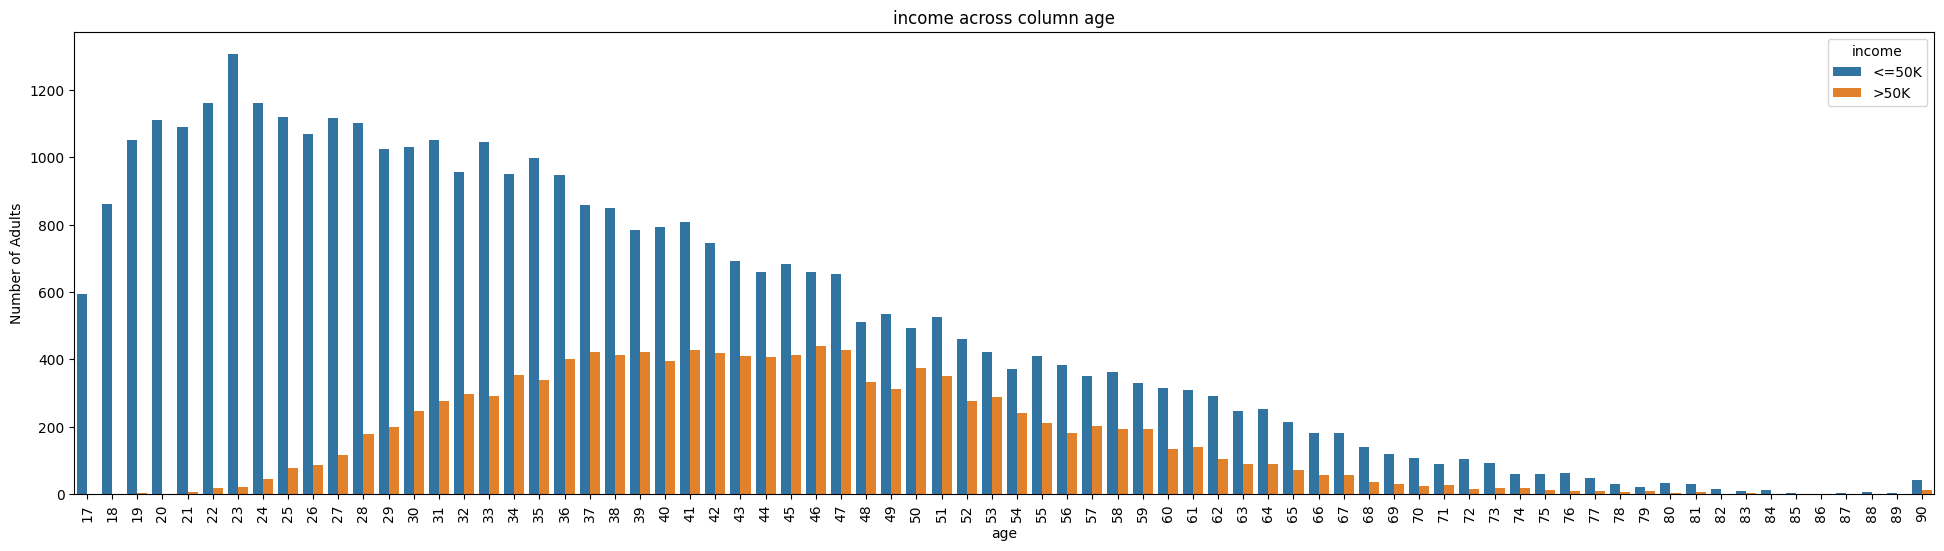

In [29]:
### BEGIN SOLUTION
plt.figure(figsize=(24, 6))
sns.countplot(dataset,x='age',hue='income')
plt.xticks(rotation='vertical')
plt.title('income across column age')
plt.ylabel('Number of Adults')
plt.show()
### END SOLUTION

In [30]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Create a countplot of income across column education

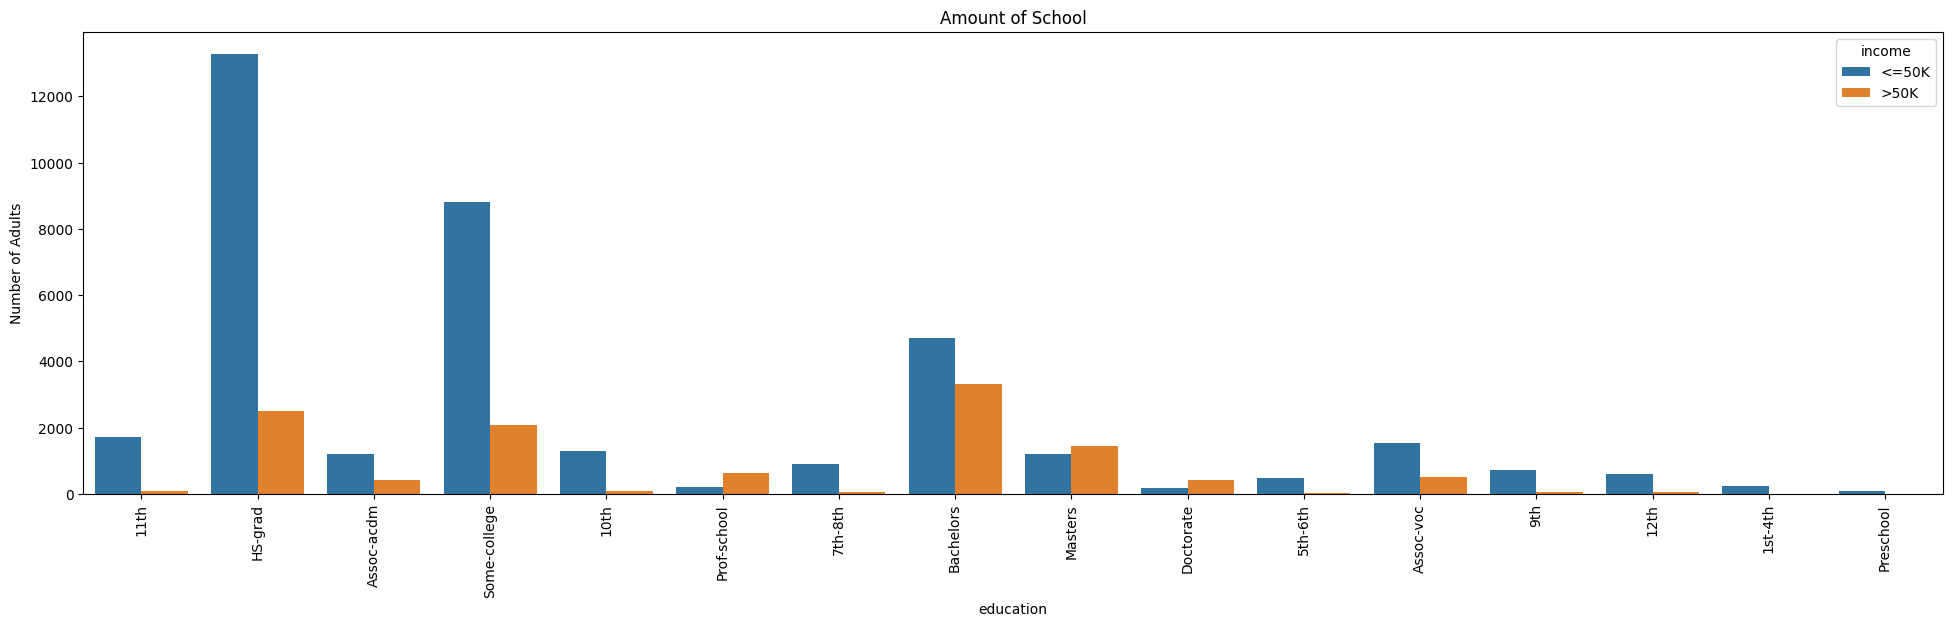

In [31]:
### BEGIN SOLUTION
# Creating a countplot of income across education
plt.figure(figsize=(24, 6))
sns.countplot(dataset,x='education',hue='income')
plt.xticks(rotation='vertical')
plt.ylabel('Number of Adults')
plt.title('Amount of School')
plt.show()
### END SOLUTION

In [32]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Create a countplot of income across column years of education

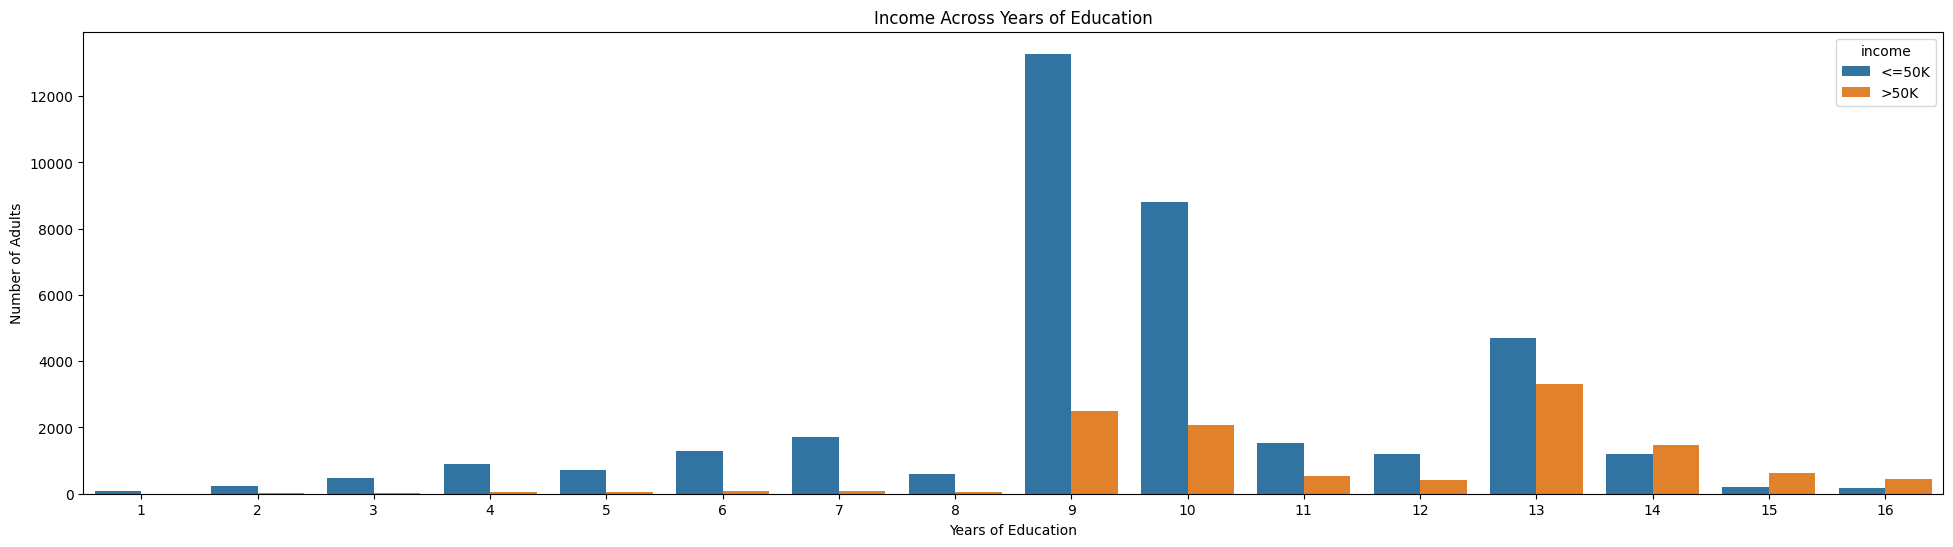

In [33]:
### BEGIN SOLUTION
# Creating a countplot of income across years of education
plt.figure(figsize=(24, 6))
sns.countplot(dataset,x='educational-num',hue='income')
plt.title('Income Across Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of Adults')
plt.show()
### END SOLUTION

In [34]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Create a countplot of income across column Marital Status

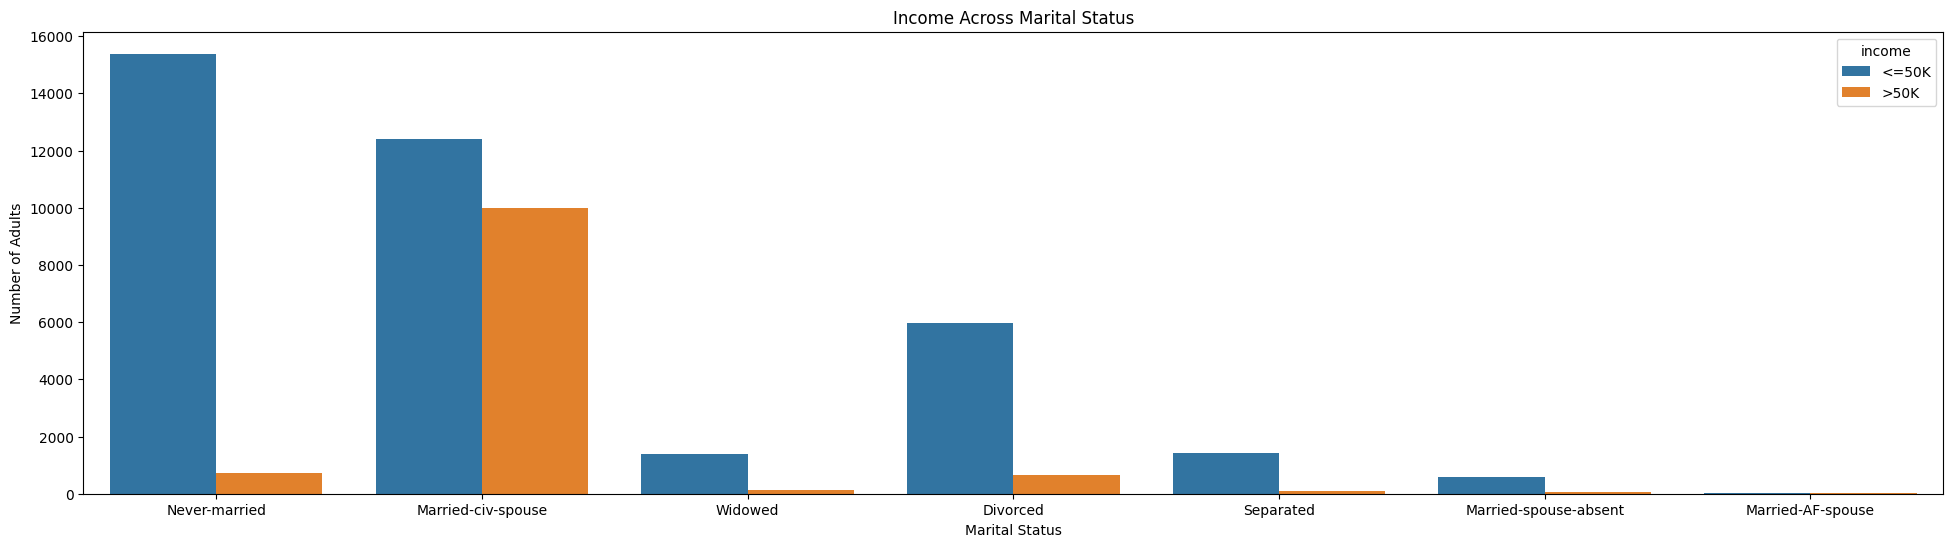

In [35]:
### BEGIN SOLUTION
# Creating a countplot of income across Marital Status
plt.figure(figsize=(24, 6))
sns.countplot(dataset,x='marital-status',hue='income')
plt.title('Income Across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Adults')
plt.show()
### END SOLUTION

In [36]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Draw a heatmap of data correlation and find out the columns to which income is highly correlated

<Axes: >

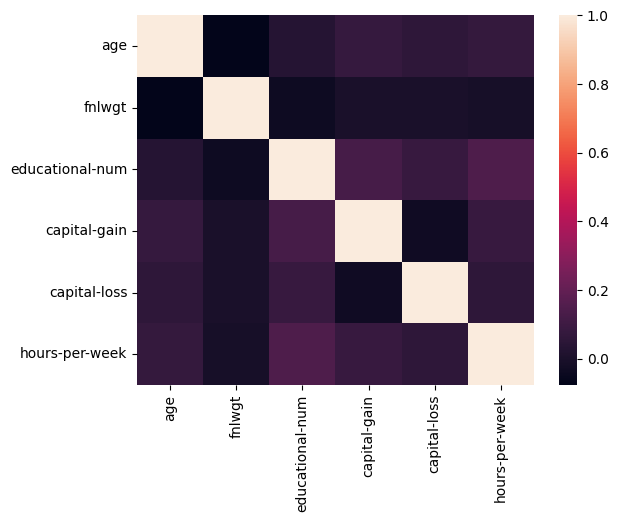

In [37]:
### BEGIN SOLUTION
correlation_matrix = dataset.corr(numeric_only=True)
sns.heatmap(correlation_matrix)
### END SOLUTION

In [38]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


5. Prepare the dataset for modeling

- Fix the '?' values in the dataset.

In [39]:
### BEGIN SOLUTION
dataset = dataset.replace('?', 'unknown')
dataset.head()

### END SOLUTION

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,unknown,103497,Some-college,10,Never-married,unknown,Own-child,White,Female,0,0,30,United-States,<=50K


In [40]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Label encode all the categorical columns.

In [63]:
### BEGIN SOLUTION
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

categorical_cols = ['workclass','race','gender','education','occupation','marital-status','relationship','native-country','income']
le = LabelEncoder()

print(categorical_cols)

for col in categorical_cols:
    dataset[col] = le.fit_transform(dataset[col])

### END SOLUTION

['workclass', 'race', 'gender', 'education', 'occupation', 'marital-status', 'relationship', 'native-country', 'income']


In [64]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Prepare independent variables X and dependent variable Y (Income).

In [65]:
### BEGIN SOLUTION
X = dataset.drop('income', axis=1)
y = dataset['income']
### END SOLUTION

In [66]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Perform feature scaling using StandardScaler and fix the imbalance in the dataset using any one of the techniques like SMOTE or RandomOverSampler

In [67]:
### BEGIN SOLUTION
scaler=StandardScaler()


### END SOLUTION

In [68]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Fixing imbalanced dataset using Oversampling

In [69]:
### BEGIN SOLUTION
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
### END SOLUTION

In [70]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Perform a train test split in the ratio 80:20 and random_state 42.

In [71]:
### BEGIN SOLUTION
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.head()
### END SOLUTION

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
37193,42,3,145175,15,10,2,6,0,4,1,0,0,40,38
31093,52,5,175029,0,6,2,2,0,4,1,0,0,35,38
33814,34,1,172664,11,9,2,2,0,4,1,0,0,40,38
14500,28,3,125791,11,9,4,0,1,4,0,0,0,40,38
23399,46,3,28419,8,11,4,13,1,4,1,0,0,50,38


In [72]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


6. Perform Data Modeling

- Train Logistic Regression Model, KNN Classifier Model, SVM Classifier, Naive Bayes Classifier, Decision Tree Classifier and Random Forest Classifier

Logistic Regression

In [73]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
### END SOLUTION

LogisticRegression()

In [74]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


KNN Classifier

In [75]:
### BEGIN SOLUTION
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(X_train,y_train)

### END SOLUTION

KNeighborsClassifier()

In [76]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Support Vector Classifier

In [77]:
### BEGIN SOLUTION
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,y_train)

### END SOLUTION

SVC()

In [78]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Naive Bayes Classifier

In [79]:
### BEGIN SOLUTION
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
### END SOLUTION

GaussianNB()

In [80]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


 Decision Tree Classifier

In [81]:
### BEGIN SOLUTION
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
### END SOLUTION

DecisionTreeClassifier()

In [82]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Random Forest Classifier

In [83]:
### BEGIN SOLUTION
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
### END SOLUTION

RandomForestClassifier()

In [84]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


 Model Evaluation

 Perform model evaluation on Accuracy and F1 score and identify the best model

In [85]:
### BEGIN SOLUTION
from sklearn.metrics import accuracy_score, f1_score, classification_report

### END SOLUTION

In [86]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct


Choose your final model and generate a matrix and report.

In [87]:
### BEGIN SOLUTION
y_pred = rfc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
### END SOLUTION

Accuracy: 0.8637526870713481
F1 Score: 0.6888005611409866
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      7479
           1       0.74      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [88]:
### BEGIN HIDDEN TESTS
assert 1 == 1, "Incorrect. Try again."
print ("Correct")
### END HIDDEN TESTS

Correct
